# Final Exam - Data Mining
Name: Low Tsu Siang

Matrix Number: WQD180072

New Study ID: 17051570

### Question 1
You are required  to make a user-agent that will crawl the WWW (your familiar domain)  to produce dataset of a particular website. 

- the web site can be as simple as a list of webpages and what other pages they link to

- the output does not need to be in XHTML (or HTML) form a multi-stage approach (e.g. produce the xhtml or html  in csv format  )        



In [1]:
import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import pandas as pd
import re

### Background
This analysis is to examine the factors of building a winning EPL team. The Premier League, often referred to as the English Premier League or the EPL outside England, is the top level of the English football league system. Contested by 20 clubs. 

The EPL team will be divided in the 5 categories according the team points. 

##### Extract main dataframe
The main dataframe will consists of team name in EPL, team's manager & team's captain. The information is extracted from wikipedia page. All the information is stored as "df" dataframe

In [2]:
my_url= "https://en.wikipedia.org/wiki/2019%E2%80%9320_Premier_League"

In [3]:
def team(my_url):    
    page_html = urllib.request.urlopen(my_url)
    page_soup = soup(page_html, "lxml")
    # Focus on retrieving data from the main table
    right_table=page_soup.find_all('table')                           
    r_table = right_table[2].tbody
    #rows
    ##Strap every role of the tables
    rows = r_table.find_all('tr')
    #rows[1]
    ###To extract & examine the data for signal row aka country (testpoint)
    team = rows[2].find_all('td')
    # Extract the website table header name
    mcolumns = [v.text.replace('\n','') for v in rows[0].find_all('th')]
    mcolumns.remove('Shirt sponsor (sleeve)')
    mcolumns.remove('Shirt sponsor (chest)')
    ## Rename columns to shortform
    maindf=[]
    maindf = pd.DataFrame(columns = mcolumns)
    ##row 0 is the table header. Value collection start at row 1
    right_table=page_soup.find_all('table')
    r_table = right_table[2].tbody
    rows = r_table.find_all('tr')
    for i in range (1, len(rows)):
        tds = rows[i].find_all('td')
        values = [tds[0].text.replace('\n',''), tds[1].text.replace('\n',''), tds[2].text.replace('\n',''), 
                      tds[3].text.replace('\n','')]
        maindf = maindf.append(pd.Series(values, index=mcolumns),ignore_index=True)
    return maindf


In [4]:
my_url20= "https://en.wikipedia.org/wiki/2019%E2%80%9320_Premier_League"
maindf20 = team(my_url20)
my_url19='https://en.wikipedia.org/wiki/2018%E2%80%9319_Premier_League'
maindf19 = team(my_url19)


In [5]:
maindf19

,Team,Manager,Captain,Kit manufacturer
0,Arsenal,Unai Emery,Laurent Koscielny,Puma[33]
1,Bournemouth,Eddie Howe,Simon Francis[36],Umbro[37]
2,Brighton & Hove Albion,Chris Hughton,Bruno[40],Nike[41]
3,Burnley,Sean Dyche,Tom Heaton[43],Puma[44]
4,Cardiff City,Neil Warnock,Sean Morrison,Adidas
5,Chelsea,Maurizio Sarri,Gary Cahill[47],Nike[48]
6,Crystal Palace,Roy Hodgson,Luka Milivojević,Puma[51]
7,Everton,Marco Silva,Phil Jagielka,Umbro[53]
8,Fulham,Scott Parker,Tom Cairney,Adidas
9,Huddersfield Town,Jan Siewert,Tommy Smith[57],Umbro[58]


##### EPL Standings Board
EPL Standings Board can be extracted from the same wikipedia page. The aim is to extract all the information on the EPL standing baord. After the web scrawling, the information is stored in "pointdf" dataframe. The main information of this dataframe is the Points for each time. This is the labelled variable of this analysis

In [6]:
def standing(myurl):
    page_html = urllib.request.urlopen(my_url)
    page_soup = soup(page_html, "lxml")
    right_table=page_soup.find_all('table')
    r_table2 = right_table[4].tbody
    rows2 = r_table2.find_all('tr')
    pcolumns = [v.text.replace('\n','') for v in rows2[0].find_all('th')]
    pcolumns.remove('Qualification or relegation')
    pcolumns.remove('Pos')
    pcolumns = ['Team', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']
    pointdf=[]
    pointdf = pd.DataFrame(columns = pcolumns)
    for i in range (1, len(rows2)):
        tds = rows2[i].find_all('td')
        pvalues = [tds[0].text.replace('\n',''), tds[1].text.replace('\n',''), tds[2].text.replace('\n',''), 
                   tds[3].text.replace('\n',''),tds[4].text.replace('\n',''),tds[5].text.replace('\n',''), 
                   tds[6].text.replace('\n',''),tds[7].text.replace('\n',''),tds[8].text.replace('\n','')]
        pointdf = pointdf.append(pd.Series(pvalues, index=pcolumns),ignore_index=True)
    return pointdf

In [7]:
my_url='https://en.wikipedia.org/wiki/2018%E2%80%9319_Premier_League'
page_html = urllib.request.urlopen(my_url)
page_soup = soup(page_html, "lxml")
right_table=page_soup.find_all('table')
r_table2 = right_table[4].tbody
rows2 = r_table2.find_all('tr')
pcolumns = [v.text.replace('\n','') for v in rows2[0].find_all('th')]
pcolumns.remove('Qualification or relegation')
pcolumns.remove('Pos')
pcolumns = ['Team', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']
pointdf19=[]
pointdf19 = pd.DataFrame(columns = pcolumns)
for i in range (1, len(rows2)):
    tds = rows2[i].find_all('td')
    pvalues = [tds[0].text.replace('\n',''), tds[1].text.replace('\n',''), tds[2].text.replace('\n',''), 
                tds[3].text.replace('\n',''),tds[4].text.replace('\n',''),tds[5].text.replace('\n',''), 
                tds[6].text.replace('\n',''),tds[7].text.replace('\n',''),tds[8].text.replace('\n','')]
    pointdf19 = pointdf19.append(pd.Series(pvalues, index=pcolumns),ignore_index=True)
pointdf19

,Team,Pld,W,D,L,GF,GA,GD,Pts
0,Manchester City (C),38,32,2,4,95,23,+72,98
1,Liverpool,38,30,7,1,89,22,+67,97
2,Chelsea,38,21,9,8,63,39,+24,72
3,Tottenham Hotspur,38,23,2,13,67,39,+28,71
4,Arsenal,38,21,7,10,73,51,+22,70
5,Manchester United,38,19,9,10,65,54,+11,66
6,Wolverhampton Wanderers,38,16,9,13,47,46,+1,57
7,Everton,38,15,9,14,54,46,+8,54
8,Leicester City,38,15,7,16,51,48,+3,52
9,West Ham United,38,15,7,16,52,55,−3,52


In [8]:
my_url22='https://en.wikipedia.org/wiki/2019%E2%80%9320_Premier_League'
page_html22 = urllib.request.urlopen(my_url22)
page_soup22 = soup(page_html22, "lxml")
right_table22=page_soup22.find_all('table')
r_table22 = right_table22[4].tbody
rows22 = r_table22.find_all('tr')
pcolumns22 = [v.text.replace('\n','') for v in rows22[0].find_all('th')]
pcolumns22.remove('Qualification or relegation')
pcolumns22.remove('Pos')
pcolumns22 = ['Team', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']
pointdf20=[]
pointdf20 = pd.DataFrame(columns = pcolumns22)
for i in range (1, len(rows22)):
    tds = rows22[i].find_all('td')
    pvalues = [tds[0].text.replace('\n',''), tds[1].text.replace('\n',''), tds[2].text.replace('\n',''), 
                tds[3].text.replace('\n',''),tds[4].text.replace('\n',''),tds[5].text.replace('\n',''), 
                tds[6].text.replace('\n',''),tds[7].text.replace('\n',''),tds[8].text.replace('\n','')]
    pointdf20 = pointdf20.append(pd.Series(pvalues, index=pcolumns22),ignore_index=True)
pointdf20

,Team,Pld,W,D,L,GF,GA,GD,Pts
0,"Liverpool (C, Q)",32,28,2,2,70,25,+45,86
1,Manchester City[a],32,21,3,8,81,33,+48,66
2,Leicester City,33,17,7,9,63,31,+32,58
3,Chelsea,33,17,6,10,60,44,+16,57
4,Manchester United,33,15,10,8,56,33,+23,55
5,Wolverhampton Wanderers,33,13,13,7,45,36,+9,52
6,Arsenal,33,12,13,8,49,41,+8,49
7,Sheffield United,32,12,11,9,33,32,+1,47
8,Tottenham Hotspur,32,12,9,11,51,44,+7,45
9,Burnley,32,13,6,13,36,45,−9,45


##### Manager Data
Manager data can be extracted from wikipedia page. Each manager name in wikipedia table consists of the hyperlink of manager profile. By extracting the "href" information, I can get the url for each manager profile website. ALl the information is stored under "managerdf" dataframe


In [9]:
def manager(my_url):    
    page_html = urllib.request.urlopen(my_url)
    page_soup = soup(page_html, "lxml")
    right_table=page_soup.find_all('table')                           
    r_table = right_table[2].tbody
    rows = r_table.find_all('tr')
    team = rows[2].find_all('td')
    ## Test Point
    ## Extract the wikipedia url for each manager
    manager_url ='https://en.wikipedia.org'+team[1] .find('span',{'class':'vcard'}).a['href']
    #manager_url
    manager_html = urllib.request.urlopen(manager_url)
    manager_soup = soup(manager_html, "lxml")
    managerdf=[]
    ccolumns = ['Manager','Age']
    managerdf = pd.DataFrame(columns = ccolumns)
    for i in range (1, len(rows)):
        cteam = rows[i].find_all('td')
        manager_url ='https://en.wikipedia.org'+cteam[1] .find('span',{'class':'vcard'}).a['href']
        value1 = cteam[1].text.replace('\n','')
        value2 = managerage(manager_url)
        cvalues = [value1, value2]
        managerdf = managerdf.append(pd.Series(cvalues,index=ccolumns),ignore_index=True)
    return managerdf

In [10]:
def managerage(manager_url):
    manager_html = urllib.request.urlopen(manager_url)
    manager_soup = soup(manager_html, "lxml")
    c_table=manager_soup.find('table', {'class':'infobox vcard'}).tbody
    age = c_table.find('span',{'class':'noprint ForceAgeToShow'}).text.replace('age\xa0','') 
    return age

def managername(manager_url):
    manager_html = urllib.request.urlopen(manager_url)
    manager_soup = soup(manager_html, "lxml")
    c_table=manager_soup.find('table', {'class':'infobox vcard'}).tbody
    c_table=manager_soup.find('table', {'class':'infobox vcard'})
    name = c_table.span.text
    return name  

In [11]:
my_url20= "https://en.wikipedia.org/wiki/2019%E2%80%9320_Premier_League"
managerdf20 = manager(my_url20)
my_url19='https://en.wikipedia.org/wiki/2018%E2%80%9319_Premier_League'
managerdf19 = manager(my_url19)

In [12]:
def mdf11(all_tables4):
    ##Squad Standard Stats
    column11 = ['Team', 'Pl', 'Poss', 'Gls', 'Ast', 'PK', 'CrdY', 'CrdR']
    df11 = []
    df11 = pd.DataFrame(columns = column11)
    rows11 = all_tables4[2].find_all('tr')
    for i in range(0, len(rows11)):
        Team = rows11[i].th.text
        Pl = rows11[i].find('td',{'data-stat':'players_used'}).text
        Poss = rows11[i].find('td',{'data-stat':'possession'}).text
        Gls = rows11[i].find('td',{'data-stat':'goals'}).text
        Ast = rows11[i].find('td',{'data-stat':'assists'}).text
        PK = rows11[i].find('td',{'data-stat':'pens_made'}).text
        CrdY= rows11[i].find('td',{'data-stat':'cards_yellow'}).text
        CrdR = rows11[i].find('td',{'data-stat':'cards_red'}).text
        values11 = [Team, Pl, Poss, Gls, Ast, PK, CrdY, CrdR]
    #    print(values11)
        df11 = df11.append(pd.Series(values11,index=column11),ignore_index=True)
    return df11


In [13]:
def mdf12(all_tables4):    
    ##Squad Goalkeeping
    #all_tables[3]
    column12 = ['Team', 'GA', 'SoTA', 'Saves', 'CS']
    df12 = []
    df12 = pd.DataFrame(columns = column12)
    rows12 = all_tables4[3].find_all('tr')
    for i in range(0, len(rows12)):
        Team = rows12[i].th.text
        GA = rows12[i].find('td',{'data-stat':'goals_against_gk'}).text
        SoTA = rows12[i].find('td',{'data-stat':'shots_on_target_against'}).text
        Saves = rows12[i].find('td',{'data-stat':'saves'}).text
        CS = rows12[i].find('td',{'data-stat':'clean_sheets'}).text
        values12 = [Team, GA, SoTA, Saves, CS]
    #    print(values12)
    #    break
        df12 = df12.append(pd.Series(values12,index=column12),ignore_index=True)
    return df12

In [14]:
def mdf13(all_tables4):
    ##Squad Shooting
    ##all_tables[5]
    rows13 = all_tables4[5].find_all('tr')
    column13 = ['Team', 'PK', 'Sh', 'SoT', 'FK']
    df13 = []
    df13 = pd.DataFrame(columns = column13)
    for i in range(0, len(rows13)):
        Team = rows13[i].th.text
        PK = rows13[i].find('td',{'data-stat':'pens_made'}).text
        Sh = rows13[i].find('td',{'data-stat':'shots_total'}).text
        SoT = rows13[i].find('td',{'data-stat':'shots_on_target'}).text
        FK = rows13[i].find('td',{'data-stat':'shots_free_kicks'}).text
        values13 = [Team, PK, Sh, SoT, FK]
    #    print(values13)
    #    break
        df13 = df13.append(pd.Series(values13,index=column13),ignore_index=True)
    return df13

In [15]:
def mdf14(all_tables4):
    ##Squad Passing
    ##all_tables[6]
    rows14 = all_tables4[6].find_all('tr')
    column14 = ['Team', 'Cmp', 'Att', 'CmpPert', 'TotDist', 'PrgDist']
    df14 = []
    df14 = pd.DataFrame(columns = column14)
    for i in range(0, len(rows14)):
        Team = rows14[i].th.text
        Cmp = rows14[i].find('td',{'data-stat':'passes_completed'}).text
        Att = rows14[i].find('td',{'data-stat':'passes'}).text
        CmpPert = rows14[i].find('td',{'data-stat':'passes_pct'}).text
        TotDist = rows14[i].find('td',{'data-stat':'passes_total_distance'}).text
        PrgDist = rows14[i].find('td',{'data-stat':'passes_progressive_distance'}).text
        values14 = [Team, Cmp, Att, CmpPert, TotDist, PrgDist]
    #    print(values14)
    #    break
        df14 = df14.append(pd.Series(values14,index=column14),ignore_index=True)
    return df14


In [16]:
def mdf15(all_tables4):
    ##Squad Defensive Actions
    #all_tables[9]
    rows15 = all_tables4[9].find_all('tr')
    column15 = ['Team', 'Tkl', 'TklW', 'Press', 'PressSucc', 'Block', 'Int', 'Clr', 'Err']
    df15 = []
    df15 = pd.DataFrame(columns = column15)
    for i in range(0, len(rows15)):
        Team = rows15[i].th.text
        Tkl = rows15[i].find('td',{'data-stat':'tackles'}).text
        TklW = rows15[i].find('td',{'data-stat':'tackles_won'}).text
        Press = rows15[i].find('td',{'data-stat':'pressures'}).text
        PressSucc = rows15[i].find('td',{'data-stat':'pressure_regains'}).text
        Block = rows15[i].find('td',{'data-stat':'blocks'}).text
        Int = rows15[i].find('td',{'data-stat':'interceptions'}).text
        Clr = rows15[i].find('td',{'data-stat':'clearances'}).text
        Err = rows15[i].find('td',{'data-stat':'errors'}).text
        values15 = [Team, Tkl, TklW, Press, PressSucc, Block, Int, Clr, Err]
    #    print(values15)
    #    break
        df15 = df15.append(pd.Series(values15,index=column15),ignore_index=True)
    return df15

In [17]:
def mdf16(all_tables4):
##Squad Possession
    #all_tables[10]
    rows16 = all_tables4[10].find_all('tr')
    column16 = ['Team', 'Touches', 'SuccDri', 'TotDistCarr', 'Targ', 'Rec', 'Miscon', 'Dispos']
    df16 = []
    df16 = pd.DataFrame(columns = column16)
    for i in range(0, len(rows16)):
        Team = rows16[i].th.text
        Touches = rows16[i].find('td',{'data-stat':'touches'}).text
        SuccDri = rows16[i].find('td',{'data-stat':'dribbles_completed'}).text
        TotDistCarr = rows16[i].find('td',{'data-stat':'carry_distance'}).text
        Targ = rows16[i].find('td',{'data-stat':'pass_targets'}).text
        Rec = rows16[i].find('td',{'data-stat':'passes_received'}).text
        Miscon = rows16[i].find('td',{'data-stat':'miscontrols'}).text
        Dispos = rows16[i].find('td',{'data-stat':'dispossessed'}).text
        values16 = [Team, Touches, SuccDri, TotDistCarr, Targ, Rec, Miscon, Dispos]
    #    print(values16)
    #    break
        df16 = df16.append(pd.Series(values16,index=column16),ignore_index=True)
    return df16

In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import sys, getopt
import csv
#url = 'https://fbref.com/en/comps/9/Premier-League-Stats'
def stats(url):
    res = requests.get(url)
    ## The next two lines get around the issue with comments breaking the parsing.
    comm = re.compile("<!--|-->")
    soup = BeautifulSoup(comm.sub("",res.text),'lxml')
    all_tables4 = soup.findAll("tbody")
    df11 =[]
    df12 =[]
    df13 =[]
    df14 =[]
    df15 =[]
    df16 =[]
    df11 = mdf11(all_tables4)
    df12 = mdf12(all_tables4)
    df13 = mdf13(all_tables4)
    df14 = mdf14(all_tables4)
    df15 = mdf15(all_tables4)
    df16 = mdf16(all_tables4)
    full_stat = []
    full_stat = pd.merge(df11, df12, how='left', left_on='Team', right_on='Team')
    full_stat = pd.merge(full_stat, df13, how='left', left_on='Team', right_on='Team')
    full_stat = pd.merge(full_stat, df14, how='left', left_on='Team', right_on='Team')
    full_stat = pd.merge(full_stat, df15, how='left', left_on='Team', right_on='Team')
    full_stat = pd.merge(full_stat, df16, how='left', left_on='Team', right_on='Team')
    return full_stat
    

In [19]:
my_url20= "https://fbref.com/en/comps/9/Premier-League-Stats"
full_stat20 = stats(my_url20)
my_url19='https://fbref.com/en/comps/9/1889/2018-2019-Premier-League-Stats'
full_stat19 = stats(my_url19)

### Question 3
You are required to write code to  create a decision tree (DT) model using the above dataset (Question 1). In order to achieve the task, you are going to cover the following steps:

	Importing required libraries

	Loading Data

Data Cleaning & Transformation

In [20]:
managerdf19['Age'] = managerdf19['Age'].replace(r'[^\d\.]+', '', regex=True).apply(pd.to_numeric, errors='coerce')
managerdf20['Age'] = managerdf20['Age'].replace(r'[^\d\.]+', '', regex=True).apply(pd.to_numeric, errors='coerce')

In [21]:
def tidypointdf(pointdf):
    test = pointdf[:1] 
    test['Team'] = test['Team'].str.split(' ').str[0]
    pointdf[:1] = test
    pointdf = pointdf.rename(columns={'Team[ vte ]':'Team'})
    pointdf['Team'] = pointdf['Team'].str.split('[').str[0]
#    pointdf['Team'] = pointdf['Team'].str.split('(').str[0]
    pointC = ('Pld', 'W', 'D', 'L', 'GF', 'GA', 'Pts')
    for i in pointC:
        pointdf[i] = pointdf[i].astype(int)
    return pointdf

In [22]:
pointdf20 = tidypointdf(pointdf20)
pointdf20

D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Team,Pld,W,D,L,GF,GA,GD,Pts
0,Liverpool,32,28,2,2,70,25,+45,86
1,Manchester City,32,21,3,8,81,33,+48,66
2,Leicester City,33,17,7,9,63,31,+32,58
3,Chelsea,33,17,6,10,60,44,+16,57
4,Manchester United,33,15,10,8,56,33,+23,55
5,Wolverhampton Wanderers,33,13,13,7,45,36,+9,52
6,Arsenal,33,12,13,8,49,41,+8,49
7,Sheffield United,32,12,11,9,33,32,+1,47
8,Tottenham Hotspur,32,12,9,11,51,44,+7,45
9,Burnley,32,13,6,13,36,45,−9,45


In [23]:
test19 = pointdf19[:1] 
test19['Team'] = test19['Team'].str.split(' ').str[0]
pointdf19[:1] = test19
pointdf19['Team'] = pointdf19['Team'].str.split('(').str[0]
pointC19 = ('Pld', 'W', 'D', 'L', 'GF', 'GA', 'Pts')
for i in pointC19:
    pointdf19[i] = pointdf19[i].astype(int)
pointdf19['Team'][0] = 'Manchester City'
pointdf19

D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Team,Pld,W,D,L,GF,GA,GD,Pts
0,Manchester City,38,32,2,4,95,23,+72,98
1,Liverpool,38,30,7,1,89,22,+67,97
2,Chelsea,38,21,9,8,63,39,+24,72
3,Tottenham Hotspur,38,23,2,13,67,39,+28,71
4,Arsenal,38,21,7,10,73,51,+22,70
5,Manchester United,38,19,9,10,65,54,+11,66
6,Wolverhampton Wanderers,38,16,9,13,47,46,+1,57
7,Everton,38,15,9,14,54,46,+8,54
8,Leicester City,38,15,7,16,51,48,+3,52
9,West Ham United,38,15,7,16,52,55,−3,52


In [24]:
## Divide Point into 3 category
def group(pts):
    if pts < 30:
        value = 1
        return value
    elif 30 <= pts and pts < 50:
        value = 2
        return value
    else:
        value = 3
        return value

In [25]:
## Divide Point into 3 category
def group2(pts):
    if pts < 40:
        value = 1
        return value
    elif 40 <= pts and pts < 70:
        value = 2
        return value
    else:
        value = 3
        return value

In [26]:
pointdf20['PtsCat'] = pointdf20['Pts'].map(group)
pointdf19['PtsCat'] = pointdf19['Pts'].map(group2)

In [27]:
decisiontdf19 = []
decisiontdf19 = maindf19
decisiontdf19 = pd.merge(decisiontdf19, managerdf19, how='left', left_on='Manager', right_on='Manager')
decisiontdf19 = pd.merge(decisiontdf19, pointdf19, how='outer')

In [28]:
decisiontdf20 = []
decisiontdf20 = maindf20
decisiontdf20 = pd.merge(decisiontdf20, managerdf20, how='left', left_on='Manager', right_on='Manager')
decisiontdf20 = pd.merge(decisiontdf20, pointdf20, how='outer')

In [29]:
full_stat20['Team'] = full_stat20['Team'].replace({'Leicester':'Leicester City', 'Brighton':'Brighton & Hove Albion', 
                                               'Norwich':'Norwich City', 'Tottenham':'Tottenham Hotspur', 
                                               'West Ham':'West Ham United', 'Manchester Utd':'Manchester United',
                                              'Newcastle Utd':'Newcastle United', 'Sheffield Utd':'Sheffield United',
                                              'Wolves':'Wolverhampton Wanderers'})
#full_stat

In [30]:
full_stat19['Team'] = full_stat19['Team'].replace({'Brighton':'Brighton & Hove Albion','Huddersfield':'Huddersfield Town',
                                                   'West Ham':'West Ham United', 'Manchester Utd':'Manchester United',
                                              'Newcastle Utd':'Newcastle United', 
                                              'Wolves':'Wolverhampton Wanderers', 'Tottenham':'Tottenham Hotspur'})

In [31]:
decisiontdf19 = pd.merge(decisiontdf19, full_stat19, how='left', left_on='Team', right_on='Team')
decisiontdf19

,Team,Manager,Captain,Kit manufacturer,Age,Pld,W,D,L,GF,...,Int,Clr,Err,Touches,SuccDri,TotDistCarr,Targ,Rec,Miscon,Dispos
0,Arsenal,Unai Emery,Laurent Koscielny,Puma[33],48.0,38.0,21.0,7.0,10.0,73.0,...,399,858,9,26528,366,104368,21172,18309,482,445
1,Bournemouth,Eddie Howe,Simon Francis[36],Umbro[37],42.0,38.0,13.0,6.0,19.0,56.0,...,383,1065,6,21928,322,79887,16105,13459,501,451
2,Brighton & Hove Albion,Chris Hughton,Bruno[40],Nike[41],61.0,38.0,9.0,9.0,20.0,35.0,...,470,1065,6,20144,304,68466,14400,11577,497,388
3,Burnley,Sean Dyche,Tom Heaton[43],Puma[44],49.0,38.0,11.0,7.0,20.0,45.0,...,344,1149,15,19071,231,59774,13162,10145,477,343
4,Cardiff City,Neil Warnock,Sean Morrison,Adidas,71.0,NaN,NaN,NaN,NaN,NaN,...,517,917,10,16127,305,49069,10335,7243,420,408
5,Chelsea,Maurizio Sarri,Gary Cahill[47],Nike[48],61.0,38.0,21.0,9.0,8.0,63.0,...,352,589,5,30655,435,121777,25586,22803,448,527
6,Crystal Palace,Roy Hodgson,Luka Milivojević,Puma[51],72.0,38.0,14.0,7.0,17.0,51.0,...,462,1042,15,21675,491,84017,15428,12729,465,541
7,Everton,Marco Silva,Phil Jagielka,Umbro[53],42.0,38.0,15.0,9.0,14.0,54.0,...,455,912,11,23004,339,85032,17031,13878,572,499
8,Fulham,Scott Parker,Tom Cairney,Adidas,39.0,NaN,NaN,NaN,NaN,NaN,...,426,985,8,23822,391,80735,18090,15145,472,502
9,Huddersfield Town,Jan Siewert,Tommy Smith[57],Umbro[58],37.0,NaN,NaN,NaN,NaN,NaN,...,521,759,6,21964,284,73902,16204,13000,424,434


In [32]:
decisiontdf20 = pd.merge(decisiontdf20, full_stat20, how='left', left_on='Team', right_on='Team')
decisiontdf20

,Team,Manager,Captain,Kit manufacturer,Age,Pld,W,D,L,GF,...,Int,Clr,Err,Touches,SuccDri,TotDistCarr,Targ,Rec,Miscon,Dispos
0,Arsenal,Mikel Arteta,Pierre-Emerick Aubameyang,Adidas[59],38,33,12,13,8,49,...,295,810,9,20608,363,83285,16127,13993,385,395
1,Aston Villa,Dean Smith,Jack Grealish,Kappa[62],49,32,7,6,19,36,...,358,858,25,17184,327,65418,12237,10054,362,370
2,Bournemouth,Eddie Howe,Simon Francis,Umbro[65],42,33,7,6,20,32,...,417,1028,12,17925,305,64863,12807,10545,437,365
3,Brighton & Hove Albion,Graham Potter,Lewis Dunk,Nike[67],45,33,8,12,13,35,...,348,785,12,21457,322,82420,16660,14159,420,444
4,Burnley,Sean Dyche,Ben Mee,Umbro,49,32,13,6,13,36,...,319,1057,4,15502,246,46176,10555,8073,336,308
5,Chelsea,Frank Lampard,César Azpilicueta,Nike[70],42,33,17,6,10,60,...,385,792,8,24217,411,93872,19524,17022,402,401
6,Crystal Palace,Roy Hodgson,Luka Milivojević,Puma[74],72,33,11,9,13,28,...,385,916,12,17977,391,62871,12717,10386,443,476
7,Everton,Carlo Ancelotti,Séamus Coleman,Umbro[76],61,32,12,8,12,40,...,348,869,9,18219,339,65855,13317,10858,421,406
8,Leicester City,Brendan Rodgers,Kasper Schmeichel,Adidas[79],47,33,17,7,9,63,...,364,894,10,22419,374,82438,17319,14986,404,433
9,Liverpool,Jürgen Klopp,Jordan Henderson,New Balance[82],53,32,28,2,2,70,...,303,765,8,24689,365,87266,20195,17473,394,372


In [33]:
decisiontdf19=decisiontdf19.dropna()
decisiontdf19['PtsCat']

0     3.0
1     2.0
2     1.0
3     2.0
5     3.0
6     2.0
7     2.0
10    2.0
11    3.0
12    3.0
13    2.0
14    2.0
15    1.0
16    3.0
17    2.0
18    2.0
19    2.0
Name: PtsCat, dtype: float64

In [34]:
decisiontdf19.size

833

In [35]:
len(decisiontdf20.columns)

49

In [36]:
decisiontdf20.columns

Index(['Team', 'Manager', 'Captain', 'Kit manufacturer', 'Age', 'Pld', 'W',
       'D', 'L', 'GF', 'GA_x', 'GD', 'Pts', 'PtsCat', 'Pl', 'Poss', 'Gls',
       'Ast', 'PK_x', 'CrdY', 'CrdR', 'GA_y', 'SoTA', 'Saves', 'CS', 'PK_y',
       'Sh', 'SoT', 'FK', 'Cmp', 'Att', 'CmpPert', 'TotDist', 'PrgDist', 'Tkl',
       'TklW', 'Press', 'PressSucc', 'Block', 'Int', 'Clr', 'Err', 'Touches',
       'SuccDri', 'TotDistCarr', 'Targ', 'Rec', 'Miscon', 'Dispos'],
      dtype='object')

In [37]:
decisiontdf = pd.concat([decisiontdf19, decisiontdf20])

In [38]:
decisiontdf.columns

Index(['Team', 'Manager', 'Captain', 'Kit manufacturer', 'Age', 'Pld', 'W',
       'D', 'L', 'GF', 'GA_x', 'GD', 'Pts', 'PtsCat', 'Pl', 'Poss', 'Gls',
       'Ast', 'PK_x', 'CrdY', 'CrdR', 'GA_y', 'SoTA', 'Saves', 'CS', 'PK_y',
       'Sh', 'SoT', 'FK', 'Cmp', 'Att', 'CmpPert', 'TotDist', 'PrgDist', 'Tkl',
       'TklW', 'Press', 'PressSucc', 'Block', 'Int', 'Clr', 'Err', 'Touches',
       'SuccDri', 'TotDistCarr', 'Targ', 'Rec', 'Miscon', 'Dispos'],
      dtype='object')

In [39]:
decisiontdf2 = decisiontdf.drop(['Team', 'Manager', 'Captain', 'Pld', 'W', 'D', 'L', 'GD', 'Pts', 
                                  'Kit manufacturer'], axis = 1) 
decisiontdf2 = decisiontdf2.drop(['GA_x'], axis = 1)
decisiontdf2 = decisiontdf2.astype(float)


In [40]:
from sklearn.model_selection import train_test_split
decisiontdf = decisiontdf.dropna()

# target/input split
y = decisiontdf2['PtsCat']
X = decisiontdf2.drop(['PtsCat'], axis=1)

	Splitting Data

In [78]:
# setting random state
import numpy as np
rs = 5

X_mat = np.asmatrix(X)
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

	Building Decision Tree Model

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

	Evaluating Model

In [80]:
print("Train accuracy:", model.score(X_train, y_train), ", Test accuracy:", model.score(X_test, y_test))

Train accuracy: 1.0 , Test accuracy: 0.75


In [81]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.50      0.50      0.50         2
         2.0       0.80      0.67      0.73         6
         3.0       0.80      1.00      0.89         4

    accuracy                           0.75        12
   macro avg       0.70      0.72      0.71        12
weighted avg       0.75      0.75      0.74        12



	Feature Selection

In [82]:
import numpy as np

# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

Poss : 0.4650086755349914
Dispos : 0.2087550607287449
Block : 0.1339285714285714
Saves : 0.12362637362637363
Att : 0.06868131868131867
SuccDri : 0.0
Touches : 0.0
GF : 0.0
Pl : 0.0
Rec : 0.0
Gls : 0.0
Ast : 0.0
PK_x : 0.0
CrdY : 0.0
CrdR : 0.0
GA_y : 0.0
SoTA : 0.0
Targ : 0.0
CS : 0.0
PK_y : 0.0


	Visualizing Decision Trees

In [83]:
import pydot
import pydotplus
from io import StringIO
from sklearn.tree import export_graphviz

# visualize
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("final1_dt.png")

In [84]:
#retrain with a small max_depth limit

model = DecisionTreeClassifier(max_depth=3, random_state=rs)
model.fit(X_train, y_train)

print("Train accuracy:", model.score(X_train, y_train),", Test accuracy:", model.score(X_test, y_test))
print()

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.92 , Test accuracy: 0.8333333333333334

              precision    recall  f1-score   support

         1.0       0.50      0.50      0.50         2
         2.0       0.83      0.83      0.83         6
         3.0       1.00      1.00      1.00         4

    accuracy                           0.83        12
   macro avg       0.78      0.78      0.78        12
weighted avg       0.83      0.83      0.83        12



In [85]:
test_score = []
train_score = []

# check the model performance for max depth from 2-20
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=rs)
    model.fit(X_train, y_train)
    
    test_score.append(model.score(X_test, y_test))
    train_score.append(model.score(X_train, y_train))

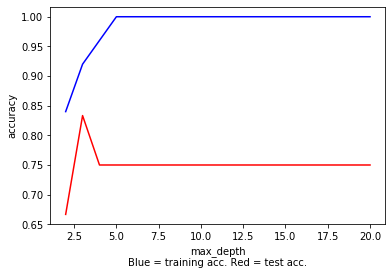

In [86]:
import matplotlib.pyplot as plt

# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')
plt.show()

### Question 4
You are required to write code to  find frequent itemsets using the above dataset (Question 1). In order to achieve the task, you are going to cover the following steps:

	Importing required libraries

In [97]:
#from apyori import apriori
from pandas import DataFrame
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpmax
import pyfpgrowth

In [88]:
n_Cat=decisiontdf.PtsCat.unique().shape[0]
print('Number of total records='+str(len(decisiontdf)))
print('Number of Point Catogery='+str(n_Cat))

Number of total records=37
Number of Point Catogery=3


	Creating a list from dataset (Question 1)

In [89]:
decisiontdf.columns

Index(['Team', 'Manager', 'Captain', 'Kit manufacturer', 'Age', 'Pld', 'W',
       'D', 'L', 'GF', 'GA_x', 'GD', 'Pts', 'PtsCat', 'Pl', 'Poss', 'Gls',
       'Ast', 'PK_x', 'CrdY', 'CrdR', 'GA_y', 'SoTA', 'Saves', 'CS', 'PK_y',
       'Sh', 'SoT', 'FK', 'Cmp', 'Att', 'CmpPert', 'TotDist', 'PrgDist', 'Tkl',
       'TklW', 'Press', 'PressSucc', 'Block', 'Int', 'Clr', 'Err', 'Touches',
       'SuccDri', 'TotDistCarr', 'Targ', 'Rec', 'Miscon', 'Dispos'],
      dtype='object')

In [90]:

Row_list =[]  
# Iterate over each row 
for index, rows in decisiontdf.iterrows(): 
    # Create list for the current row 
    my_list =[rows.Team, rows.Pts, rows.CmpPert, rows.CS, rows.Press, rows.Ast, rows.PtsCat] 
      
    # append the list to the final list 
    Row_list.append(my_list) 
  
# Print the list 
print(Row_list) 

[['Arsenal', 70.0, '82.3', '8', '6149', '52', 3.0], ['Bournemouth', 45.0, '77.2', '10', '6740', '43', 2.0], ['Brighton & Hove Albion', 36.0, '73.7', '7', '6874', '24', 1.0], ['Burnley', 40.0, '69.3', '8', '6288', '32', 2.0], ['Chelsea', 72.0, '86.1', '16', '6254', '52', 3.0], ['Crystal Palace', 49.0, '76.3', '12', '7161', '33', 2.0], ['Everton', 54.0, '76.0', '14', '6597', '34', 2.0], ['Leicester City', 52.0, '77.4', '10', '6784', '34', 2.0], ['Liverpool', 97.0, '83.5', '21', '6195', '55', 3.0], ['Manchester City', 98.0, '87.5', '20', '5487', '71', 3.0], ['Manchester United', 66.0, '81.1', '7', '6216', '40', 2.0], ['Newcastle United', 45.0, '71.6', '11', '7340', '33', 2.0], ['Southampton', 39.0, '72.3', '7', '7432', '27', 1.0], ['Tottenham Hotspur', 71.0, '82.3', '13', '5919', '47', 3.0], ['Watford', 50.0, '74.8', '7', '6896', '39', 2.0], ['West Ham United', 52.0, '77.3', '7', '6747', '33', 2.0], ['Wolverhampton Wanderers', 57.0, '77.7', '9', '6221', '35', 2.0], ['Arsenal', 46.0, '82.9

	Convert list to dataframe with boolean values

In [91]:
## Divide Point into 10 category
def group3(pts):
    if pts < 20:
        value = 1
        return value
    elif 20 <= pts and pts < 30:
        value = 2
        return value
    elif 30 <= pts and pts < 40:
        value = 3
        return value
    elif 40 <= pts and pts < 50:
        value = 4
        return value
    elif 50 <= pts and pts < 60:
        value = 5
        return value
    elif 60 <= pts and pts < 70:
        value = 6
        return value
    elif 70 <= pts and pts < 80:
        value = 7
        return value
    elif 80 <= pts and pts < 90:
        value = 8
        return value
    elif 90 <= pts and pts < 100:
        value = 9
        return value
    elif 100 <= pts and pts < 110:
        value = 10
        return value
    else:
        value = 11
        return value

In [92]:
df = DataFrame (Row_list,columns=['Team', 'Pts', 'CmpPert', 'CS', 'Press', 'Ast', 'PtsCat'])
df['PtsCat'] = df['Pts'].map(group3)
df['Quantity'] = 1
print (df)

                       Team   Pts CmpPert  CS Press Ast  PtsCat  Quantity
0                   Arsenal  70.0    82.3   8  6149  52       7         1
1               Bournemouth  45.0    77.2  10  6740  43       4         1
2    Brighton & Hove Albion  36.0    73.7   7  6874  24       3         1
3                   Burnley  40.0    69.3   8  6288  32       4         1
4                   Chelsea  72.0    86.1  16  6254  52       7         1
5            Crystal Palace  49.0    76.3  12  7161  33       4         1
6                   Everton  54.0    76.0  14  6597  34       5         1
7            Leicester City  52.0    77.4  10  6784  34       5         1
8                 Liverpool  97.0    83.5  21  6195  55       9         1
9           Manchester City  98.0    87.5  20  5487  71       9         1
10        Manchester United  66.0    81.1   7  6216  40       6         1
11         Newcastle United  45.0    71.6  11  7340  33       4         1
12              Southampton  39.0    7

In [93]:
basket = (df.groupby(['PtsCat', 'Team'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('PtsCat'))
basket = basket.astype(int)
basket.dtypes

Team
Arsenal                    int32
Aston Villa                int32
Bournemouth                int32
Brighton & Hove Albion     int32
Burnley                    int32
Chelsea                    int32
Crystal Palace             int32
Everton                    int32
Leicester City             int32
Liverpool                  int32
Manchester City            int32
Manchester United          int32
Newcastle United           int32
Norwich City               int32
Sheffield United           int32
Southampton                int32
Tottenham Hotspur          int32
Watford                    int32
West Ham United            int32
Wolverhampton Wanderers    int32
dtype: object

In [94]:
def encode_units(x):
    if x <= 0:
        return bool(0)
    if x >= 1:
        return bool(1)
basket_sets = basket.applymap(encode_units)
basket_sets

Team,Arsenal,Aston Villa,Bournemouth,Brighton & Hove Albion,Burnley,Chelsea,Crystal Palace,Everton,Leicester City,Liverpool,Manchester City,Manchester United,Newcastle United,Norwich City,Sheffield United,Southampton,Tottenham Hotspur,Watford,West Ham United,Wolverhampton Wanderers
PtsCat,,,,,,,,,,,,,,,,,,,,
2,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,True,False,True,False,True,False,True,True,False,False,False,False,True,False,True,True,True,False,False,False
5,False,False,False,False,False,True,False,True,True,False,False,True,False,False,False,False,False,True,True,True
6,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
7,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
8,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False


	Find frequently occurring itemsets using Apriori Algorithm

In [95]:
associations = apriori(basket_sets, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
associations

<generator object apriori at 0x00000279833E4CC8>

In [99]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.250,(Arsenal)
1,0.125,(Aston Villa)
2,0.250,(Bournemouth)
3,0.125,(Brighton & Hove Albion)
4,0.125,(Burnley)
...,...,...
657,0.125,"(Arsenal, Sheffield United, Newcastle United, ..."
658,0.125,"(Arsenal, Sheffield United, Newcastle United, ..."
659,0.125,"(Arsenal, Sheffield United, Newcastle United, ..."
660,0.125,"(Sheffield United, Newcastle United, Everton, ..."


	Find frequently occurring itemsets using F-P Growth

In [101]:
FP_frequent_itemsets = pyfpgrowth.find_frequent_patterns(basket, 2)

In [102]:
FP_frequent_itemsets

{('L', 'i', 'r'): 3,
 ('L', 'e', 'i', 'r'): 7,
 ('L', 'e', 'r'): 4,
 ('L', 'e', 'e', 'r'): 3,
 ('L', 't'): 2,
 ('L', 'r', 't'): 2,
 ('L', 'i', 't'): 4,
 ('L', 'e', 't'): 6,
 ('L', 'i', 'r', 't'): 2,
 ('L', 'e', 'r', 't'): 2,
 ('L', 'e', 'i', 't'): 4,
 ('L', 'e', 'i', 'r', 't'): 2,
 ('L', 'o'): 2,
 ('L', 'o', 'r'): 2,
 ('L', 'i', 'o'): 2,
 ('L', 'e', 'o'): 2,
 ('L', 'i', 'o', 'r'): 2,
 ('L', 'e', 'o', 'r'): 2,
 ('L', 'e', 'i', 'o'): 2,
 ('L', 'e', 'i', 'o', 'r'): 2,
 ('L', 'i'): 3,
 ('L', 'e', 'i'): 7,
 ('L', 'e'): 4,
 ('L', 'e', 'e'): 3,
 ('M', 'c', 'n', 't', 't'): 3,
 ('M', 'c', 'e', 'n', 't', 't'): 8,
 ('M', 'c', 'e', 'n', 't'): 16,
 ('M', 'c', 'e', 'e', 'n', 't'): 14,
 ('M', 'c', 'e', 'n'): 8,
 ('M', 'c', 'e', 'e', 'n'): 7,
 ('M', 'c', 't', 't'): 2,
 ('M', 'c', 'e', 't', 't'): 5,
 ('M', 'c', 'e', 't'): 10,
 ('M', 'c', 'e', 'e', 't'): 8,
 ('M', 'c', 'e'): 5,
 ('M', 'c', 'e', 'e'): 4,
 ('M', 'c', 'h', 'n', 't', 't'): 3,
 ('M', 'c', 'e', 'h', 'n', 't', 't'): 8,
 ('M', 'c', 'e', 'h', 'n

Mine the Association Rules

In [103]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bournemouth),(Arsenal),0.250,0.250,0.125,0.5,2.0,0.06250,1.50
1,(Arsenal),(Bournemouth),0.250,0.250,0.125,0.5,2.0,0.06250,1.50
2,(Burnley),(Arsenal),0.125,0.250,0.125,1.0,4.0,0.09375,inf
3,(Arsenal),(Burnley),0.250,0.125,0.125,0.5,4.0,0.09375,1.75
4,(Chelsea),(Arsenal),0.250,0.250,0.125,0.5,2.0,0.06250,1.50
